# Lets Grow More Data Science Intern

# Task 3:  Prediction using Decision Tree Algorithm

Name- Kiran Hasabe

# Import Libaries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv(r"C:\Downloads\Iris data.csv")
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.shape

(150, 6)

In [5]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
data.duplicated().value_counts()

False    150
dtype: int64

In [8]:
data['Species'].replace({'setosa':1,'versicolor':2,'virginica':3},inplace=True)

In [9]:
data.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


In [10]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

<AxesSubplot:xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

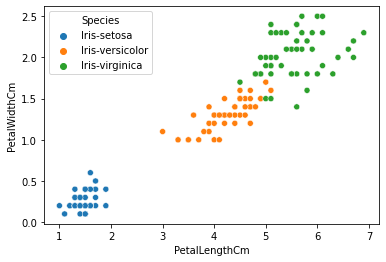

In [11]:
sns.scatterplot(x='PetalLengthCm',y='PetalWidthCm',data=data,hue='Species')

<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

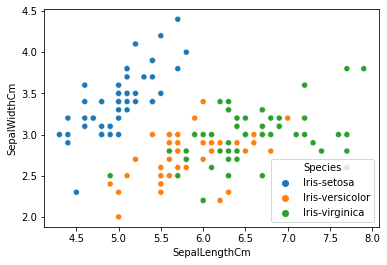

In [12]:
sns.scatterplot(x='SepalLengthCm',y='SepalWidthCm',data=data,hue='Species')

Text(69.0, 0.5, 'Actual')

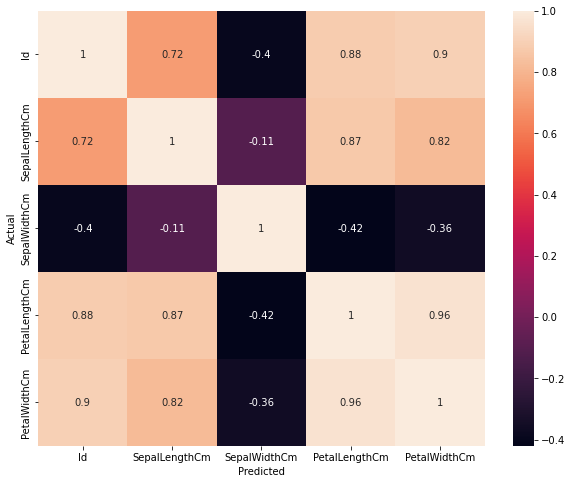

In [13]:
plt.figure(figsize=(10,8))
sns.heatmap(data=data.corr(),annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

Text(0.5, 1.0, 'Count')

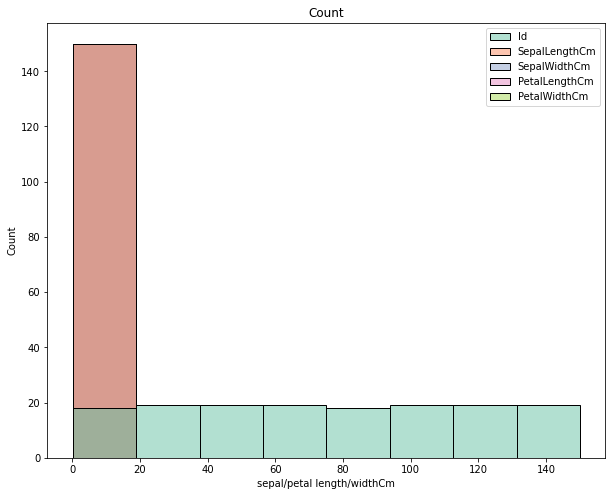

In [14]:
plt.figure(figsize=(10,8))
sns.histplot(data=data,bins=8,palette='Set2')
plt.xlabel('sepal/petal length/widthCm')
plt.title('Count')

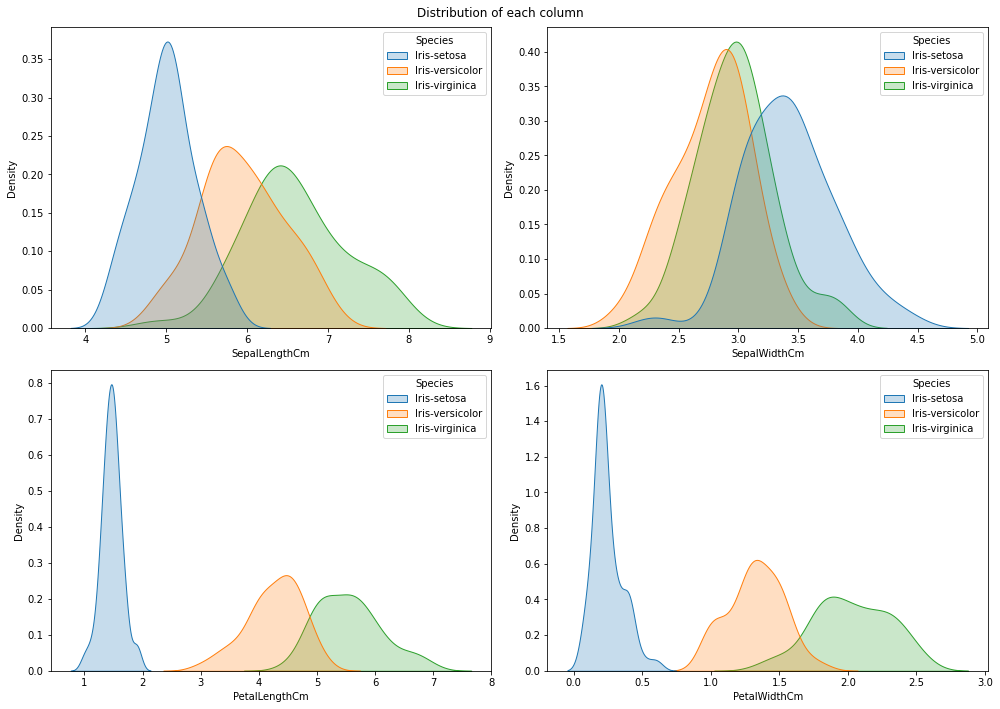

In [15]:
fig,axes=plt.subplots(figsize=(14,10),nrows=2,ncols=2)
plt.suptitle('Distribution of each column')
sns.kdeplot(data=data,x='SepalLengthCm',hue='Species',shade=True,ax=axes[0][0])
sns.kdeplot(data=data,x='SepalWidthCm',hue='Species',shade=True,ax=axes[0][1])
sns.kdeplot(data=data,x='PetalLengthCm',hue='Species',shade=True,ax=axes[1][0])
sns.kdeplot(data=data,x='PetalWidthCm',hue='Species',shade=True,ax=axes[1][1])
plt.tight_layout()
plt.show()

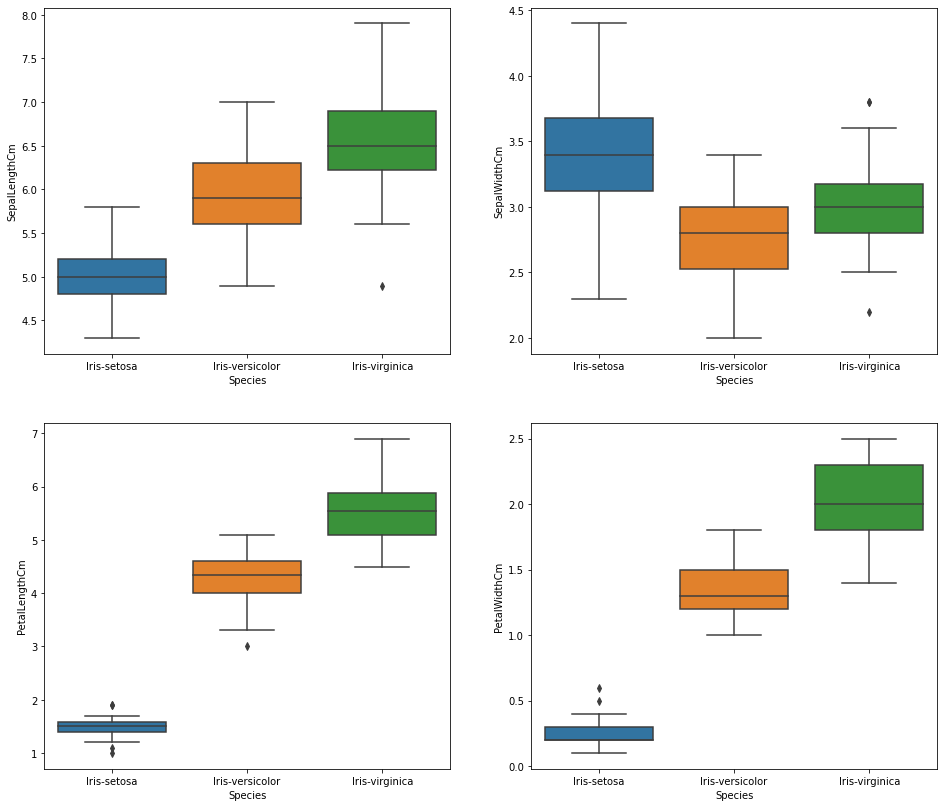

In [16]:
fig,axes=plt.subplots(figsize=(16,14),nrows=2,ncols=2)
sns.boxplot(x='Species',y='SepalLengthCm',data=data,ax=axes[0][0])
sns.boxplot(x='Species',y='SepalWidthCm',data=data,ax=axes[0][1])
sns.boxplot(x='Species',y='PetalLengthCm',data=data,ax=axes[1][0])
sns.boxplot(x='Species',y='PetalWidthCm',data=data,ax=axes[1][1])
plt.show()


# Logistic Regression

In [17]:
from sklearn.metrics import accuracy_score,classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Decision Tree Classifier

In [18]:
x=data.drop('Species',axis=1)

In [19]:
x

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3
146,147,6.3,2.5,5.0,1.9
147,148,6.5,3.0,5.2,2.0
148,149,6.2,3.4,5.4,2.3


In [20]:
y=data['Species']
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=101)

In [22]:
x_train

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
74,75,6.4,2.9,4.3,1.3
88,89,5.6,3.0,4.1,1.3
96,97,5.7,2.9,4.2,1.3
42,43,4.4,3.2,1.3,0.2
134,135,6.1,2.6,5.6,1.4
...,...,...,...,...,...
63,64,6.1,2.9,4.7,1.4
70,71,5.9,3.2,4.8,1.8
81,82,5.5,2.4,3.7,1.0
11,12,4.8,3.4,1.6,0.2


In [23]:
x_test.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
33,34,5.5,4.2,1.4,0.2
16,17,5.4,3.9,1.3,0.4
43,44,5.0,3.5,1.6,0.6
129,130,7.2,3.0,5.8,1.6
50,51,7.0,3.2,4.7,1.4


In [24]:
y_test

33         Iris-setosa
16         Iris-setosa
43         Iris-setosa
129     Iris-virginica
50     Iris-versicolor
123     Iris-virginica
68     Iris-versicolor
53     Iris-versicolor
146     Iris-virginica
1          Iris-setosa
147     Iris-virginica
32         Iris-setosa
31         Iris-setosa
122     Iris-virginica
127     Iris-virginica
Name: Species, dtype: object

In [25]:
y_train

74     Iris-versicolor
88     Iris-versicolor
96     Iris-versicolor
42         Iris-setosa
134     Iris-virginica
            ...       
63     Iris-versicolor
70     Iris-versicolor
81     Iris-versicolor
11         Iris-setosa
95     Iris-versicolor
Name: Species, Length: 135, dtype: object

In [26]:
model=DecisionTreeClassifier()

In [27]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [28]:
y_pred=model.predict(x_test)
y_pred

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica'], dtype=object)

# Accuracy

In [29]:
from sklearn.metrics import confusion_matrix

In [30]:
conf=confusion_matrix(y_test,y_pred)
conf

array([[6, 0, 0],
       [1, 2, 0],
       [0, 0, 6]], dtype=int64)

<AxesSubplot:>

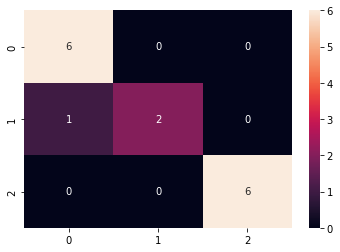

In [31]:
sns.heatmap(data=conf,annot=True)

In [32]:
model.score(x_test,y_test)*100

93.33333333333333

In [33]:
from sklearn import metrics
print('accuracy score:',metrics.accuracy_score(y_test,y_pred))

accuracy score: 0.9333333333333333


# Perform Evaluation on Test set

In [34]:
clr=classification_report(y_test,y_pred)
print(clr)

                 precision    recall  f1-score   support

    Iris-setosa       0.86      1.00      0.92         6
Iris-versicolor       1.00      0.67      0.80         3
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           0.93        15
      macro avg       0.95      0.89      0.91        15
   weighted avg       0.94      0.93      0.93        15



# Modeling

In [35]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree

In [36]:
iristree=DecisionTreeClassifier(criterion="entropy",max_depth=4)

In [37]:
iristree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [38]:
iristree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [39]:
predtree=iristree.predict(x_test)

In [40]:
print(predtree[0:5])
print(y_test[0:5])

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor']
33         Iris-setosa
16         Iris-setosa
43         Iris-setosa
129     Iris-virginica
50     Iris-versicolor
Name: Species, dtype: object


# Visualization

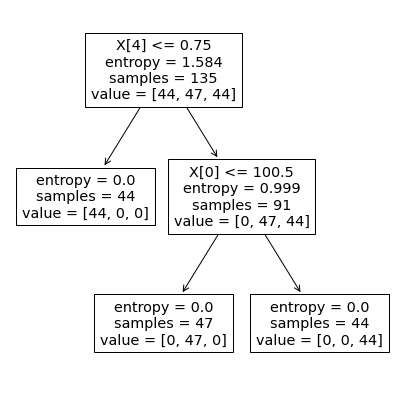

In [41]:
plt.figure(figsize=(7,7))
tree.plot_tree(iristree)
plt.show()

# Thank you...!!!